In [4]:
import xarray as xr

In [5]:
a = xr.open_dataset('/g/data/oi10/replicas/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/day/ta/gr/v20200310/ta_day_EC-Earth3_historical_r1i1p1f1_gr_19700101-19701231.nc')
a

ERROR 1: PROJ: proj_create_from_database: Open of /g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/share/proj failed
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'gini' loading failed:
name 'metar' is not defined
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:    (time: 365, bnds: 2, plev: 8, lat: 256, lon: 512)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-01T12:00:00 ... 1970-12-31T12:00:00
  * plev       (plev) float64 1e+05 8.5e+04 7e+04 5e+04 ... 1e+04 5e+03 1e+03
  * lat        (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon        (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ta         (time, plev, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time:            0.0
    comment:                Production: Thomas Reerink at KNMI
    contact:                cmip6-data@ec-earth.org
    ...                     ...
    license:                CMIP6 model data produced by EC-Earth-Consortium ...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/d3592f49-be25-4040-a6d4-4efd6c3fb972
    branch_time_in_child:   0.0D
    branch_time_in_parent:  149749.0D
    history:                2019-09-26T04:32:25Z ; CMOR rewrote data to be co...

In [17]:
da = a['ta']
da

<xarray.DataArray 'ta' (time: 365, plev: 8, lat: 256, lon: 512)>
[382730240 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1970-12-31T12:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon      (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
Attributes:
    standard_name:  air_temperature
    long_name:      Air Temperature
    comment:        Air Temperature
    units:          K
    cell_methods:   time: mean
    cell_measures:  area: areacella
    history:        2019-09-26T04:36:21Z altered by CMOR: Reordered dimension...

In [7]:
# theta =  da * (1000e2 / da.plev)**(287/1005)                  # theta = T (P_0/P)^(R_d/C_p)
# plevs1, plevs2 = [400e2, 250e2], [925e2, 700e2]               # pressure levels in ERA are reversed to cmip
# da1, da2 = [theta.sel(plev=slice(plevs1[0], plevs1[1])), theta.sel(plev=slice(plevs2[0], plevs2[1]))]
# da = ((da1 * da1.plev).sum(dim='plev') / da1.plev.sum(dim='plev')) - ((da2 * da2.plev).sum(dim='plev') / da2.plev.sum(dim='plev'))   

In [8]:
b = xr.open_dataset('/g/data/oi10/replicas/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/fx/sftlf/gr/v20200310/sftlf_fx_EC-Earth3_historical_r1i1p1f1_gr.nc')
b

<xarray.Dataset>
Dimensions:   (lat: 256, bnds: 2, lon: 512)
Coordinates:
  * lat       (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon       (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 ...
    lon_bnds  (lon, bnds) float64 ...
    sftlf     (lat, lon) float32 ...
Attributes: (12/47)
    external_variables:     areacella
    forcing_index:          1
    initialization_index:   1
    physics_index:          1
    realization_index:      1
    Conventions:            CF-1.7 CMIP-6.2
    ...                     ...
    branch_method:          standard
    tracking_id:            hdl:21.14100/68510608-6587-463a-bde5-56f63d7d7a6d
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.EC-Earth-Con...
    branch_time_in_child:   0.0D
    branch_time_in_parent:  149749.0D
    history:                2019-09-30T10:31:03Z ; CMOR rewrote data to be co...

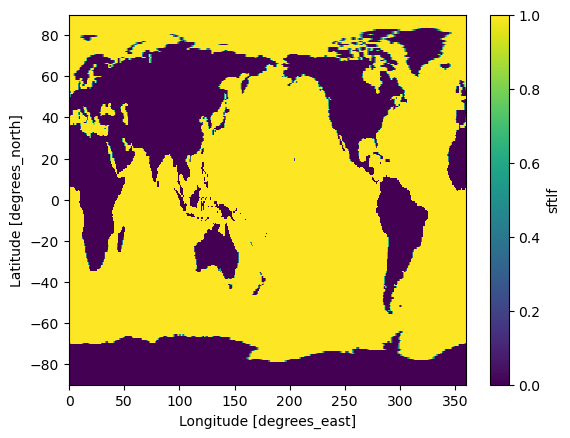

In [12]:
mask = (((b['sftlf']/100)-1)*-1)
mask.plot()

In [14]:
da.plev

<xarray.DataArray 'plev' (plev: 8)>
array([100000.,  85000.,  70000.,  50000.,  25000.,  10000.,   5000.,   1000.])
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
Attributes:
    units:          Pa
    axis:           Z
    positive:       down
    long_name:      pressure
    standard_name:  air_pressure

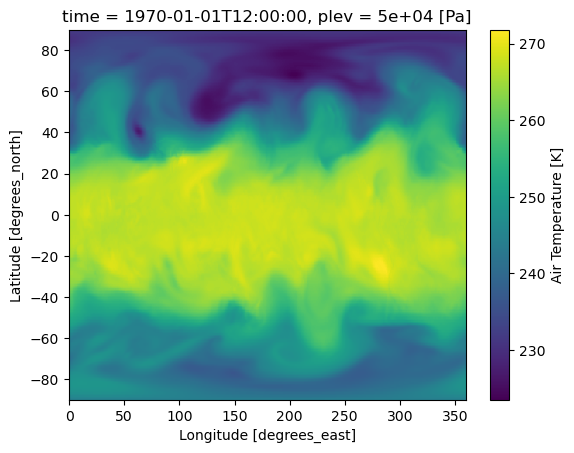

In [18]:
da.isel(time=0).sel(plev = 500e2).plot()

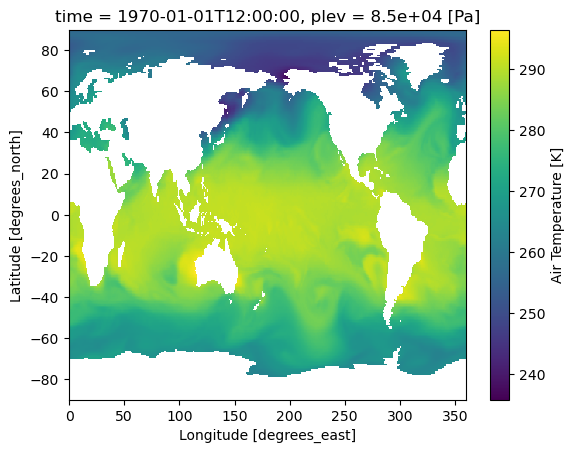

In [21]:
da.isel(time=0).sel(plev = 850e2).where(mask>0).plot()

In [ ]:
da.sel(plev = 500e2).where(mask>0).mean(dim = ('lat', 'lon'))